<a href="https://colab.research.google.com/github/wjh818/Data_hwj/blob/main/Machine_Learning/4_SVM_%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

* 선형 svm ("LinearSVC, LinearSVR")
  * 직선을 투영하는 방식
* 비선형 SVM (커널 SVM)
  * 일반적인 SVM

SV(Support Vector)를 훈련 시에 데이터 포인트로부터 선형, 서포트 벡터의 개수와 범위를 지정하면서 복잡도를 조절한다.

In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 5.3MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=c89a519acc38643d40417317e9960e211a4d0b1f9e4ac4c9624bf7309ec20881
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


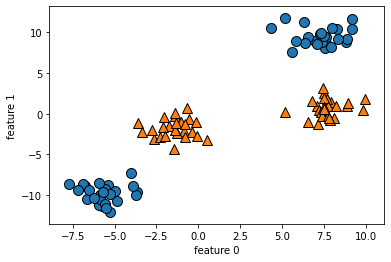

In [2]:
import mglearn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(centers=4, random_state=8)
y = y % 2 # 레이블 만들기

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


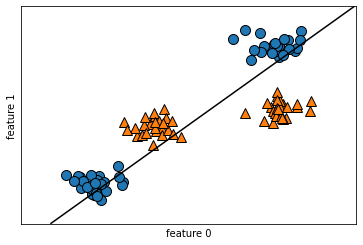

In [3]:
# 선형 모델 LinearSVC를 이용해서 직선으로 결정경계 만들어 보기
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

완벽하게 분리하기

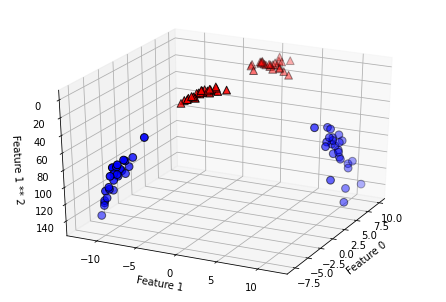

In [4]:
import numpy as np

X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

#3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

# y == 0인 포인트를 그리고 다음 y == 1 인 포인트를 그리기
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


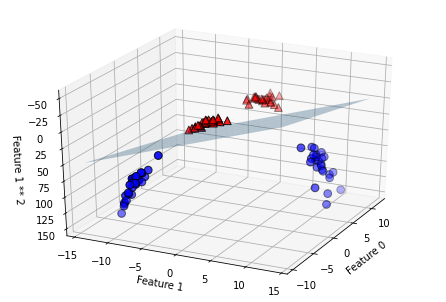

In [5]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")
plt.show()

## 커널 SVM
수학적 기교를 사용하는 것이 아닌 커널 트릭(kernel trick)을 이용하는 방식
  * RBF(radial basis function): 가우시안 커널 $k(x_1, x_2) = \exp \left( -\gamma ||x_1-x_2||^2 \right)$

커널 svm이 훈련 되면서 하는 일들
  * SVM 모델이 배우는 것: **훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 배운다.**
  * 훈련 데이터의 일부만 결정 경계를 만드는데 영향을 미친다. **두 클래스 사이의 경계에 위치한 데이터 포인트**
  * 이 데이터 포인트를 **서포트 벡터(support vector)**라고 한다.

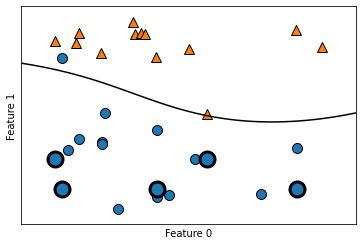

In [6]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

#서포트 벡터
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됨
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv_labels, s = 15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

## SVM의 하이퍼 파라미터

* gamma
 * 가우시안 커널폭의 **역수**
 * **gamma** 매개변수가 하나의 훈련 샘플에 미치는 영향의 범위를 설정
 * gamma가 커지면 복잡도가 올라감
 * 연관성 있는 데이터포인트 끼리의 모임을 만든다.

* C
 * 서포트 벡터 선정에 영향을 미치는 규제 매개 변수
 * 각 데이터 포인트의 중요도 값을 제한한다.
 * 서포터 벡터는 == 포인트 중요도
 * 포인트 중요도 : 서포트 벡터로써, 결정 경계를 구성하는데 어떠한 역할을 하는지


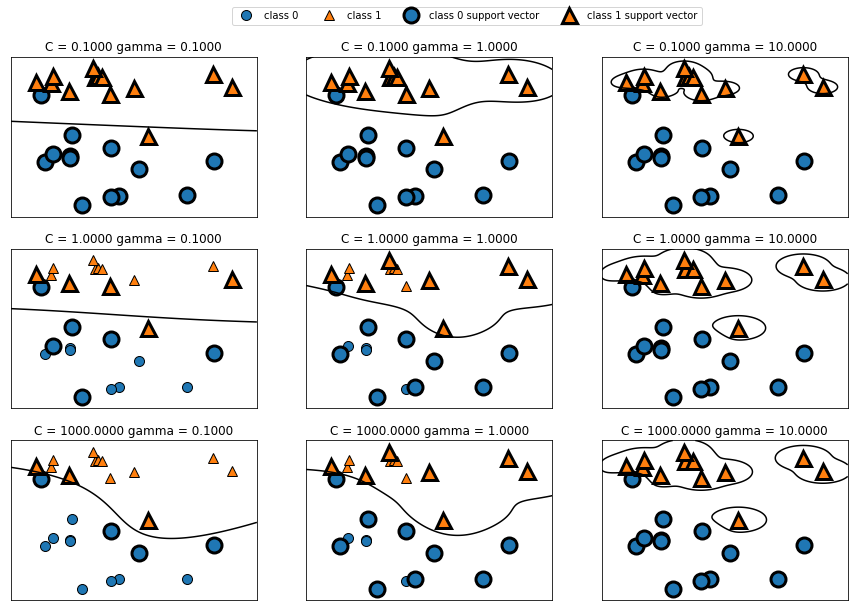

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]) :
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "class 0 support vector", "class 1 support vector"],
                  ncol=4, loc=(.9, 1.2))
plt.show()

#### SVM으로 유방암 데이터셋 처리하기

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    random_state=0
)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


유방암 데이터셋은 특성 사이의 스케일의 차이가 큼

SVM은 데이터 특성사이의 스케일이 작을 때가 좋기 때문에 보통 MinMaxSCaler를 많이 사용한다.